In [11]:
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))



In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,validation_data = (x_test,y_test), epochs=10,batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0144 - acc: 0.9957 - val_loss: 0.0814 - val_acc: 0.9788
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0095 - acc: 0.9971 - val_loss: 0.0949 - val_acc: 0.9757
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0099 - acc: 0.9969 - val_loss: 0.0935 - val_acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0996 - val_acc: 0.9765
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0104 - acc: 0.9967 - val_loss: 0.1078 - val_acc: 0.9744
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0088 - acc: 0.9970 - val_loss: 0.1017 - val_acc: 0.9787
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0070 - acc: 0.9977 - val_loss: 0.

In [20]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.1420 - acc: 0.9734
0.14204690578772616
0.9734


In [21]:
#model’s performance on test data:
y_pred = model.predict(x_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

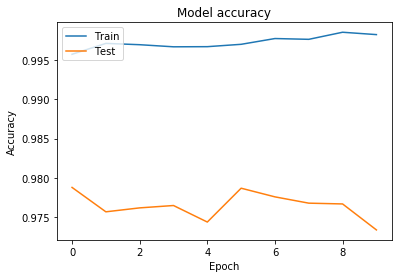

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()